# Logistic Regression Homework

This is the 2nd assignment for CAP 4630 and we will implement logistic regression and apply it to two
different datasets. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
You are **not** allowed to use Machine Learning libaries such as Scikit-learn and Keras.

**Task Overview:**
- Logistic Regression 

## 1 - Logistic Regression ##
### 1.1 Packages

Import useful packages for scientific computing and data processing. 

**Tasks:**
1. Import numpy and rename it to np.
2. Import pandas and rename it to pd.
3. Import the pyplot function in the libraray of matplotlib and rename it to plt.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.

**Attention:**
1. After this renaming, you will use the new name to call functions. For example, **numpy** will become **np** in the following sections.

In [1]:
# Import and rename libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.2 - Data Preparation ##

Prepare the data for regression task. **(20 Points)**

**Tasks:**
1. Load data for logistic regression.
2. **Generate the SCATTER PLOT of the data**.

**Hints:**
1. The data file is "data_logistic.csv", which are exam scores for students.
2. The data is organized by column: x1 (exam 1 score), x2 (exam 2 score), and label y (pass 1 or fail 0).
3. Please use different colors for postive(label=1) and negative(label=0) data.
4. An example of scatter plots is shown below.

![](https://drive.google.com/uc?export=view&id=1CPv5s4W8SkUMa_sXCIz-NejSnFj-e1IH)

Saving data_logistic.csv to data_logistic.csv


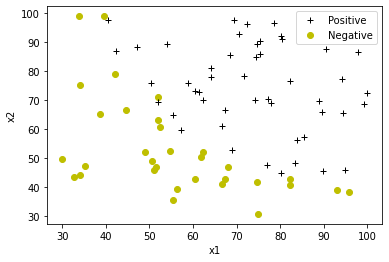

In [2]:
# Preprocess input data and generate plots
from google.colab import files
uploaded = files.upload()

df=pd.read_csv('data_logistic.csv')
df.columns=['x1','x2','label']
groups = df.groupby('label')

fig, ax = plt.subplots()

for name, group in groups:
    for x in group.values:
        if x[2] == 1:
            positive, = ax.plot(x[0], x[1], 'k+', label='positive')
        else:
            negative, = ax.plot(x[0], x[1], 'yo', label='negative')        

plt.xlabel('x1')
plt.ylabel('x2')
ax.legend([positive,negative], ["Positive","Negative"],loc='upper right')
plt.show()

### 1.3 - Sigmoid function ##


Implement sigmoid function so it can be called by the rest of your program. **(20 Points)**

**Tasks:**
1. Implement the sigmoid function (**def sigmoid(z):**). 
2. Test the sigmoid function by function **plotting** with test data (X, Y) where Y = sigmoid(X). 

**Hints:**  
1. Given the class material, sigmoid function is defined as:
$g(z) = \frac{1}{1+e^{-z}}$.
2. You may consider X = np.linspace(-5, 5, 1000) to plot the curve.
3. Plot Y against X.
4. An example of plot for validation is shown below:

![](https://drive.google.com/uc?export=view&id=18j5oHdw78uVm2WwHsdIb4hwhpXDxR37S)

In [3]:
# Implement sigmoid fuction here
def sigmoid(z): 
  return 1/(1 + np.exp(-z))

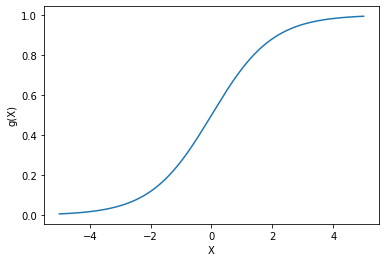

In [4]:
# Plot data here

X = np.linspace(-5, 5, 1000)
y = sigmoid(X)
plt.xlabel('X')
plt.ylabel('g(X)')
plt.plot(X,y)

### 1.4 - Cost function and gradient ##

Implement the cross entropy cost function and its gradient for logistic regression. **(30 Points)**

**Tasks:**
1. Implement the "cal_cost" to compute the cost.
2. Implement the "cal_grad" to compute the gradients.
3. Test "cal_cost" and "cal_grad" with initial values and print out the results.

**Hint:**
1. The cross entropy cost function (J(θ)) in logistic regression is shown below. It involves two terms, including ylog(h) and (1-y)log(1-h) where h is the function of x.

![](https://drive.google.com/uc?export=view&id=1xLhlPFI4wekwuA7lFm7ebRVt0XBZk3e7)

2. The gradient of the cost J(θ) is a vector of the same length as θ where the $j$th element (for $j = 0, 1, . . . , n)$ is defined below. You may do a hand calculation to justify the first order derivative with the term above.

![](https://drive.google.com/uc?export=view&id=1xfA0A0xyRv2L5JZIdedAmEZxZ3DwpOCF)

3. When you implement J(θ), please use eps = 1e-15 to prevent possible "divide by 0 exception" in second term. You may think about the reason.
4. You may consider the below templates for two functions:

    def cal_cost(theta, X, y):
 
        htheta = ...
        term1 = ...  /* matrix_multiplication(log(htheta), y)
        term2 = ...  /* matrix_multiplication(log(1-htheta+eps), (1-y))
        J = - 1 / m * (term1 + term2) 
        
        return cost
        
    
    def cal_grad(theta, X, y):
        
        htheta = ...
        term1 = ... /* matrix_multiplication(transpose(X), (htheta - y))  //you may think about why transpose(x)
        grad = 1 / m * term1 
    
        return grad
5. It involves matrix multiplication and you may consider the function of np.matmul or np.dot.   
        
6. Initialize the intercept term (constant term) with **ones** and the theta with **zeros**. Test the functions with these initial values. \
    **Expected outputs:**\
    Cost at initial theta : 0.6931471805599445\
    Gradient at inital theta : [-0.1        -10.91242026 -11.73652937]


In [67]:
# Implement the cost function here


def cal_cost(theta,X,y):
    htheta=sigmoid(np.dot(X,theta.T))
    term1=np.dot(np.log(htheta),y)
    term2=np.dot(np.log((1-htheta)+eps),(1-y))
    cost = (-1/m) * (term1+term2).sum()
    return cost



def cal_grad(theta,X,y):
    htheta=sigmoid(np.dot(X,theta.T))
    term1=np.dot(X.T,(htheta-y))
    grad=(1/m)*term1
    return grad

eps=1e-15
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.array(list(zip(df.iloc[:,0],df.iloc[:,1])))
y=np.array(df.iloc[:,2])
    
m=y.shape[0]
intercept = np.ones((X.shape[0],1))
X = np.concatenate((intercept,X),axis= 1)
theta=np.zeros(X.shape[1])

cost=cal_cost(theta,X,y)
print("Cost at initial theta:", cost)

gradient=cal_grad(theta,X,y)
print("Gradient at initial theta:",gradient)


Cost at initial theta: 0.6931471805599445
Gradient at initial theta: [ -0.1        -10.91242026 -11.73652937]


## 1.5 Train parameters with Gradient Descent ##


Train parameters using Gradient Descent. **(15 Points)**

**Tasks:**
1. Calculate best fit theta by Gradient Descent with learning rate of **0.001 (1e-3)** and epoch of **80K**. The initial theta from above blocks is used as initial values.
2. Print out the best theta (the last one is considered as the best here) and its corresponding cost.
3. **Plot the decision boundary**.

**Hints:**
1. You may take gradient descent in homework 1 as an template.
2. Derive the boundary line from **sigmoid(theta[0]+ X1 * theta[1] + X2* theta[2])=0.5**. Think about why we get the line by setting **the activated probability to 0.5**. Also, try to calculate the final relationship between X1 and X2. When sigmoid(X) = 0.5, what is the value of x? Check the generated plot in 1.3.
3. The validation of first 5 epochs (updated theta and cost): \
------Epoch 0------\
Theta: [0.0001     0.01091242 0.01173653]\
Cost: 0.6996118077359638\
------Epoch 1------\
Theta: [-0.0001129   0.00053949  0.00229352]\
Cost: 0.6649331468590681\
------Epoch 2------\
Theta: [-5.93604956e-05  8.33145873e-03  1.07754324e-02]\
Cost: 0.6679914364992459\
------Epoch 3------\
Theta: [-0.0002356   0.0004607   0.00370829]\
Cost: 0.6545873034874964\
------Epoch 4------\
Theta: [-0.00020363  0.00683227  0.01065138]\
Cost: 0.6563302142684528
4. You may take the plots below as an exmample: 

![](https://drive.google.com/uc?export=view&id=1xLg9LrIF888gGXj3zRAG9iJLsyAmgPQg)

5. It may take ~1 min to finish running.

In [149]:
# Gradient Descent Implementation Here


def gradient_descent(theta,X,y,learning_rate=.001,epochs=80000):
    for i in range(epochs):
        cost=cal_cost(theta,X,y)
        gradient=cal_grad(theta,X,y)
        theta=theta-(learning_rate*gradient)

    print(f"-----Epoch {i}-----")
    print("Theta:",theta)
    print("Cost:",cost)
    return theta
theta=gradient_descent(theta,X,y)

-----Epoch 79999-----
Theta: [-10.09438202   0.07898772   0.08625155]
Cost: 0.3041571173875884


[48.33795849 66.2245767  29.24580372 31.7616126  65.51790672 41.60228528
 56.07885818 48.54346523 61.67002468 41.73241092 55.33603609 87.06718836
 85.70337835 43.59738597 34.75492536 30.18635741 70.28553456 54.80961829
 69.82767178 84.71977965 46.5383296  40.57623349 70.75529793 89.50684466
 60.41114347 72.09437917 60.05172625 67.00029603 53.78092941 40.19780353
 38.82218194 64.61596203 69.09478535 55.90868358 69.31459555 66.35474941
 81.51482124 30.54455591 34.90972108 76.12776475 55.38436204 26.0831886
 45.67263262 69.37190065 35.6083532  49.03850248 60.0074592  46.34212194
 69.42920576 25.61353008 60.82408532 61.66789141 85.72940578 70.82547302
 63.14864839 41.65878946 30.86419782 58.38807348 51.28421303 78.50221416
 58.26199902 48.8150504  54.33188502 47.98817225 27.49661721 78.33165295
 34.20294226 73.75038465 67.60842501 48.55570005 47.91299511 43.43568131
 43.51552112 52.32358354 50.78050278 45.02120585 79.98386316 53.51128189
 85.97496383 80.82566197]


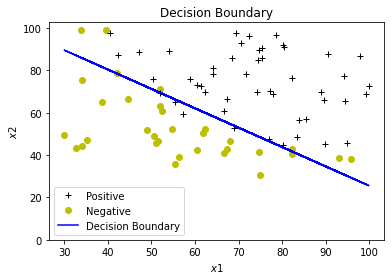

In [345]:
# Draw Decision Boundary Here

def model(X,theta):
    return -(theta[0]+theta[1]*X[:,1])/theta[2]

def plot_decision_boundary(X,theta):
    groups = df.groupby('label')
    fig, ax = plt.subplots()
    for name, group in groups:
        for x in group.values:
            if x[2] == 1:
                positive, = ax.plot(x[0], x[1], 'k+',label='positive')
            else:
                negative, = ax.plot(x[0], x[1], 'yo', label='negative')    

    db_y = model(X,theta)
    db, = ax.plot(X[:,1],db_y,color='blue',label='Decision Boundary')
    plt.title("Decision Boundary")
    print(db_y)

    plt.xlabel(r'$x1$')
    plt.ylabel(r'$x2$')
    plt.yticks(np.arange(0,100+1, 20))
    ax.legend([positive,negative,db], ["Positive","Negative","Decision Boundary"],loc='lower left')
    plt.show()

    return db_y
db_y=plot_decision_boundary(X,theta)



### 1.6 Evaluating Logistic Regression

Evaluate the model with given data. **(15 Points)**

**Tasks:**
1. Calculate the training accuracy and **PRINT IT OUT**.
2. Evaluate the predicted probability of the learnt model with x1 = 56 and x2 = 32 and **PRINT IT OUT**.


**Hints:**  
1. Positive(prediction>0.5) and negative(prediction<=0.5). 
2. The prediction results are based on acceptance probability. Given the two exam scores, we expected the model yields either high probability of "fail" or low probability of "pass".
3. Training accuracy should be around **85%**.

In [352]:
# Evaluate the model

y_plot = X[:,2]
label = df.iloc[:,2]
TP_count = 0
TN_count = 0
total = 0
for i in range(len(X[:,2])):
    if(y_plot[i] > db_y[i]):
        #print(i,y_plot[i])
        if(label[i] == 1):
            TP_count += 1
    if(y_plot[i] < db_y[i]):
        #print(y_plot[i])
        if(label[i] == 0):
            TN_count += 1
    total += 1


acc=((TP_count+TN_count)/total) *100
print('Training accurary:',acc,'%')
print('When (x1,x2) = (56,32):',sigmoid(theta[0]+ 56 * theta[1] + 32* theta[2])*100)

Training accurary: 87.5 %
When (x1,x2) = (56,32): 5.161149333407179
